#Final Project: Visualizing World Happiness Level and Prediction

Zoe Wang

2020/04/30

## Load Dataset

In [15]:
import pandas as pd

# Read data from file
dfs = []
url = 'https://raw.githubusercontent.com/WZoe/t81_577_data_project/master/data/raw/20'
for i in range(5):
    dfs.append(pd.read_csv(url+str(i+15)+'.csv'))
    display(dfs[i].head())

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
# Raw data preprocess: merging data into one df
dfs[0] = dfs[0].drop('Region',1).drop('Standard Error',1).drop('Dystopia Residual',1)
dfs[0].columns = ['Country', 'Rank', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
dfs[0]['Year'] = 2015

dfs[1] = dfs[1].drop('Region',1).drop('Lower Confidence Interval',1).drop('Dystopia Residual',1).drop('Upper Confidence Interval',1)
dfs[1].columns = ['Country', 'Rank', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
dfs[1]['Year'] = 2016

dfs[2] = dfs[2].drop('Whisker.high',1).drop('Whisker.low',1).drop('Dystopia.Residual',1)
dfs[2].columns = ['Country', 'Rank', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust']
dfs[2]['Year'] = 2017

dfs[3].columns = ['Rank', 'Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust']
dfs[3]['Year'] = 2018

dfs[4].columns = ['Rank', 'Country', 'Score', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust']
dfs[4]['Year'] = 2019

df = pd.concat(dfs, axis=0)
df['Number']=range(1, df.shape[0]+1)
display(df)

,Country,Rank,Score,GDP,Family,Health,Freedom,Trust,Generosity,Year,Number
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,1
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,2
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,3
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,4
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,5
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019,778
152,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019,779
153,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019,780
154,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019,781


In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     782 non-null    object 
 1   Rank        782 non-null    int64  
 2   Score       782 non-null    float64
 3   GDP         782 non-null    float64
 4   Family      782 non-null    float64
 5   Health      782 non-null    float64
 6   Freedom     782 non-null    float64
 7   Trust       781 non-null    float64
 8   Generosity  782 non-null    float64
 9   Year        782 non-null    int64  
 10  Number      782 non-null    int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 73.3+ KB


Country       0
Rank          0
Score         0
GDP           0
Family        0
Health        0
Freedom       0
Trust         1
Generosity    0
Year          0
Number        0
dtype: int64

In [0]:
# Filling NA with mean value
df['Trust'] = df['Trust'].fillna(df['Trust'].median())

## Part I: Data Visualization


### 1. Happiness Scores in 2019 by Country

This graph shows the happiness score for each countries in 2019.

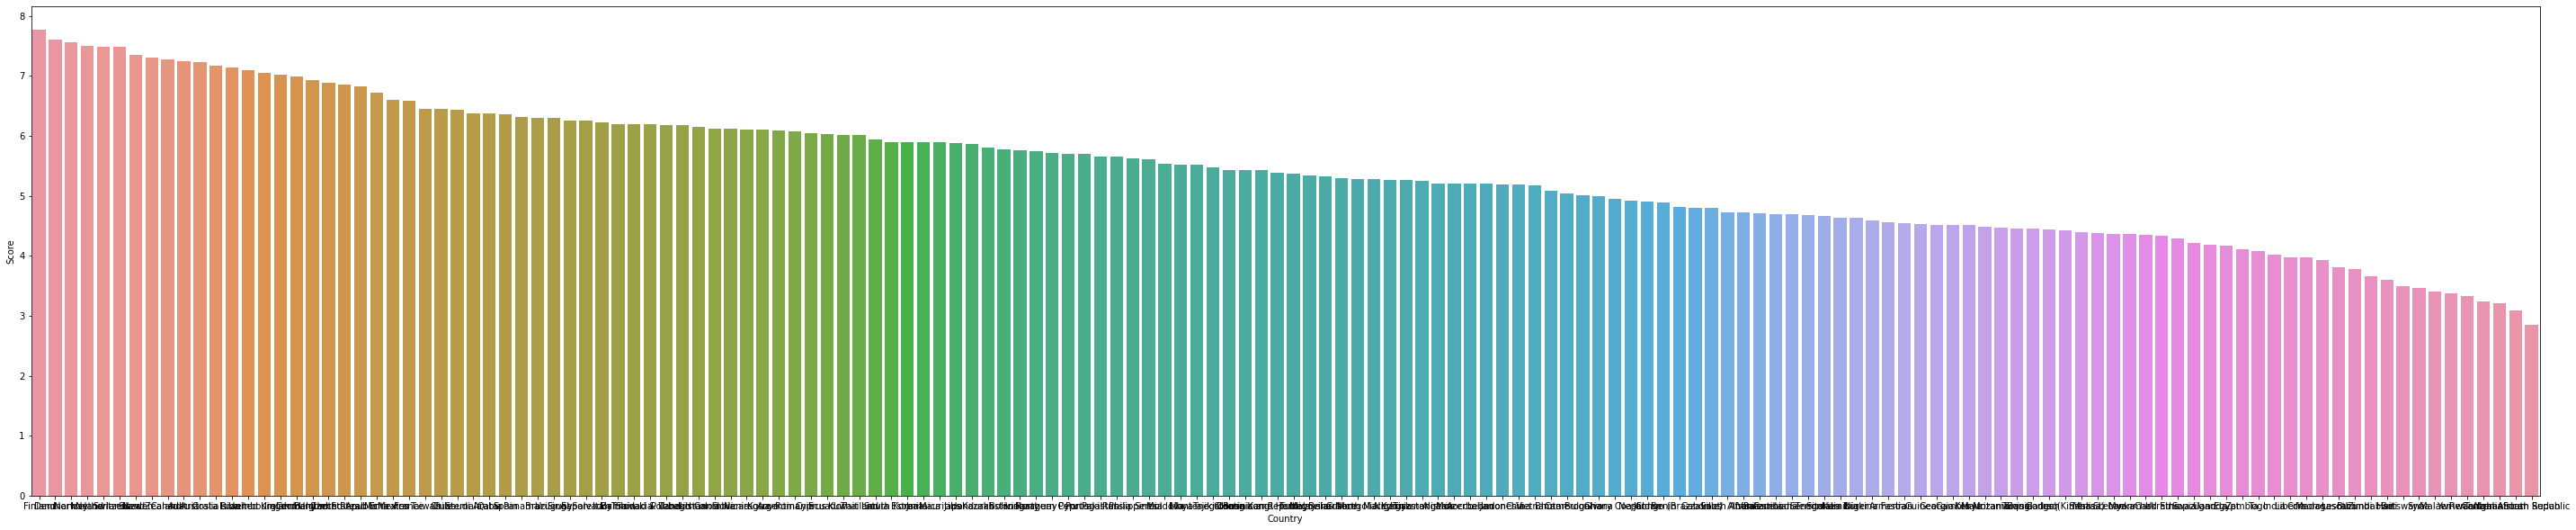

In [32]:
import matplotlib.pyplot as plt
import seaborn

h_score_2019 = df.loc[df['Year']==2019]
plt.figure(figsize=(50,10))
seaborn.barplot(x='Country', y='Score', data=h_score_2019)

plt.ylabel = 'Happiness Score'
plt.xlabel = 'Country'
plt.show()

### 2. Mean Number for Each Metrics

This table and graph shows the average happiness score, GDP level, family support, health/life expectancy, freedom level, trust/government corruoption and generosity level among all countries during 2015 to 2019.

,value
Score,5.379018
GDP,0.916047
Family,1.078392
Health,0.612416
Freedom,0.411091
Trust,0.125392
Generosity,0.218576


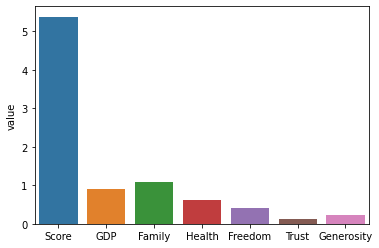

In [42]:
mean_metrics = pd.DataFrame(df.drop('Rank',1).drop('Year',1).drop('Number',1).mean())
mean_metrics.columns = ['value']
display(mean_metrics)

seaborn.barplot(x=mean_metrics.index, y='value', data=mean_metrics)

### 3. The Correlation between Score and GDP per capita

This is a scatter graph showing the correlation between happiness score and GDP per captia among all countries during 2015 to 2019. 

From the graph we can see there is a positive correlation between GDP and happiness score. Generally higher GDP means higher score.

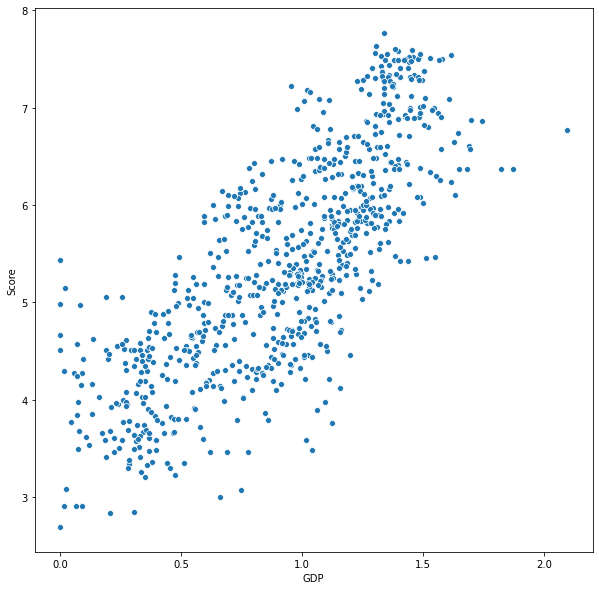

In [46]:
plt.figure(figsize=(10,10))
seaborn.scatterplot(x='GDP', y='Score', data=df)
plt.show()

### 4. Trends in United States from 2015 to 2019

This graph shows the changing trend of United States from 2015 to 2019.

It shows that during these years, the overall happiness score is dropping and therefore, United States is ranking lower among all countries. Generosity, Trust and GDP are dropping across the years, which might be the cause for happiness score drop.

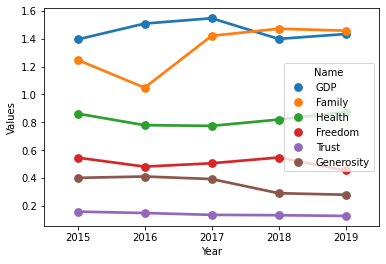

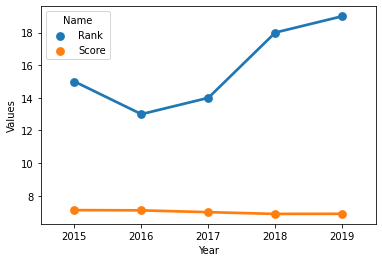

In [61]:
# extracting US only data
us_trends = df.loc[df['Country']=='United States'].drop('Country', 1).drop('Number', 1).drop('Year', 1)
us_trends = us_trends.set_index([['2015', '2016', '2017', '2018', '2019']])
us_rs_trends = us_trends[['Rank', 'Score']]
us_trends = us_trends.drop('Rank',1).drop('Score',1)

# grouping and resetting
us_trends=us_trends.stack().reset_index()
us_trends.columns = ['Year','Name','Values']
us_rs_trends=us_rs_trends.stack().reset_index()
us_rs_trends.columns = ['Year','Name','Values']

# plot
seaborn.pointplot(x='Year', y='Values', hue='Name',data=us_trends)
plt.show()
seaborn.pointplot(x='Year', y='Values', hue='Name',data=us_rs_trends)
plt.show()

## Part II: Predicting Happiness Score

Objective: Given A country's relevant metrics e.g. GDP, Life Expectancy, predict its happiness score.

In [66]:
# drop irrelevent fields
df1 = df.drop('Rank',1).drop('Number',1).drop('Year',1).drop('Country',1)
print(df1.columns)

# identiry x, y
X = df1.drop('Score',1).values
y = df1['Score'].values

Index(['Score', 'GDP', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity'], dtype='object')


In [0]:
# Split test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [0]:
# Create preprocessing pipeline
# - Impute missing values
# - Create polynomial features (degree 3) from GDP and Health
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
import numpy as np

transformer = ColumnTransformer([("norm1", SimpleImputer(missing_values=np.nan, strategy='mean'), [0, 1,2,3,4,5]),
                                ('poly', PolynomialFeatures(3),[0,2])])

In [0]:
# Fit linear regression model from pipeline
# - Apply feature scaling so that all features have values between 0 and 1
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model=Pipeline(steps=([('transformer', transformer),
                      ('scaler',StandardScaler()), ('LR', LinearRegression())]))

lr = model.fit(X_train,y_train)

### Compare prediction with test data

In [85]:
y_pred = lr.predict(X_test)
report = pd.DataFrame(y_pred, columns=['y_pred'])
report['y_test'] = y_test
report['difference'] = report['y_pred'] - report['y_test']

display(report)

print('The RMSE for this prediction is')
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

,y_pred,y_test,difference
0,6.743523,6.726,0.017523
1,4.317595,4.754,-0.436405
2,4.683799,4.677,0.006799
3,3.754855,3.763,-0.008145
4,5.901211,6.578,-0.676789
...,...,...,...
152,4.503679,4.996,-0.492321
153,6.319927,6.123,0.196927
154,7.102979,7.495,-0.392021
155,5.799808,6.008,-0.208192


The RMSE for this prediction is


0.24304305472575458